In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from tqdm import tqdm
from math import cos, asin, sqrt

import matplotlib.pyplot as plt
%matplotlib inline
# import seaborn as sns

In [2]:
df_sample = pd.read_csv('data/DataSample.csv')
df_poi = pd.read_csv('data/POIList.csv')

In [3]:
df_sample.head()

,_ID,TimeSt,Country,Province,City,Latitude,Longitude
0,4516516,2017-06-21 00:00:00.143,CA,ON,Waterloo,43.49347,-80.49123
1,4516547,2017-06-21 18:00:00.193,CA,ON,London,42.93990,-81.27090
2,4516550,2017-06-21 15:00:00.287,CA,ON,Guelph,43.57760,-80.22010
3,4516600,2017-06-21 15:00:00.307,CA,ON,Stratford,43.37160,-80.97730
4,4516613,2017-06-21 15:00:00.497,CA,ON,Stratford,43.37160,-80.97730


In [4]:
df_poi.head()

,POIID,Latitude,Longitude
0,POI1,53.546167,-113.485734
1,POI2,53.546167,-113.485734
2,POI3,45.521629,-73.566024
3,POI4,45.224830,-63.232729


In [5]:
len(df_sample)

22025

In [6]:
len(df_sample.drop_duplicates())

22025

In [7]:
# df_sample = df_sample.sort_values(by=[' TimeSt'])

In [8]:
df_sample.head()

,_ID,TimeSt,Country,Province,City,Latitude,Longitude
0,4516516,2017-06-21 00:00:00.143,CA,ON,Waterloo,43.49347,-80.49123
1,4516547,2017-06-21 18:00:00.193,CA,ON,London,42.93990,-81.27090
2,4516550,2017-06-21 15:00:00.287,CA,ON,Guelph,43.57760,-80.22010
3,4516600,2017-06-21 15:00:00.307,CA,ON,Stratford,43.37160,-80.97730
4,4516613,2017-06-21 15:00:00.497,CA,ON,Stratford,43.37160,-80.97730


In [9]:
df_sample.Country.value_counts(), df_sample.Province.value_counts()

(CA    22025
 Name: Country, dtype: int64,
 ON    9321
 AB    8554
 QC    1534
 BC     881
 SK     868
 MB     346
 NB     249
 NS     200
 NL      63
 NT       5
 YT       3
 PE       1
 Name: Province, dtype: int64)

In [10]:
pd.to_datetime(df_sample[' TimeSt'][0]).timestamp(), df_sample[' TimeSt'][0]

(1498003200.143, '2017-06-21 00:00:00.143')

In [11]:
df_sample['timestamp'] = [pd.to_datetime(df_sample[' TimeSt'][i]).timestamp() for i in range(0, len(df_sample))]

In [12]:
df_sample.head()

,_ID,TimeSt,Country,Province,City,Latitude,Longitude,timestamp
0,4516516,2017-06-21 00:00:00.143,CA,ON,Waterloo,43.49347,-80.49123,1.498003e+09
1,4516547,2017-06-21 18:00:00.193,CA,ON,London,42.93990,-81.27090,1.498068e+09
2,4516550,2017-06-21 15:00:00.287,CA,ON,Guelph,43.57760,-80.22010,1.498057e+09
3,4516600,2017-06-21 15:00:00.307,CA,ON,Stratford,43.37160,-80.97730,1.498057e+09
4,4516613,2017-06-21 15:00:00.497,CA,ON,Stratford,43.37160,-80.97730,1.498057e+09


In [13]:
df_sample.City.isna().sum()

0

In [14]:
# df_sample.timestamp[0], 
df_sample.iloc[0]

_ID                          4516516
 TimeSt      2017-06-21 00:00:00.143
Country                           CA
Province                          ON
City                        Waterloo
Latitude                     43.4935
Longitude                   -80.4912
timestamp                  1.498e+09
Name: 0, dtype: object

In [15]:
# df_sample['timestamp'] - df_sample['timestamp'][0]

In [16]:
cities = df_sample.City.values
cities

array(['Waterloo', 'London', 'Guelph', ..., 'Whitby', 'Oakville',
       'Oakville'], dtype=object)

In [17]:
# df_sample.drop()
# df_sample['timestamp'][0]

In [18]:
df_sample[df_sample['City'] == 'Kenora']

,_ID,TimeSt,Country,Province,City,Latitude,Longitude,timestamp
2419,4638187,2017-06-21 19:06:48.230,CA,ON,Kenora,49.7573,-94.3427,1.498072e+09
15721,5303037,2017-06-21 16:55:29.790,CA,ON,Kenora,49.7828,-94.4411,1.498064e+09
15722,5303129,2017-06-21 08:55:29.850,CA,ON,Kenora,49.7828,-94.4411,1.498035e+09
15833,5308611,2017-06-21 18:55:44.787,CA,ON,Kenora,49.7573,-94.3427,1.498071e+09
16990,5367138,2017-06-21 22:59:56.167,CA,ON,Kenora,49.7828,-94.4411,1.498086e+09


# Cleanup

In [19]:
def find_similar_timestamps(df):
    df = df.sort_values(by = ['timestamp'])
    df_non_sus = pd.DataFrame(columns=df.columns)
    df_sus = pd.DataFrame(columns=df.columns)
    
    df['timedifference'] = df['timestamp'] - df.iloc[0]['timestamp']
    base_request = df.iloc[0]
    df = df.iloc[1:]
    
    df_non_sus = df[df['timedifference'] > 100] #100 because it is in seconds, we can change it
    df_non_sus.append(base_request)
    
    df_sus = df[df['timedifference'] <= 100]
    
#     print(len(df_sus), len(df_non_sus), city)
    
    return df_non_sus, df_sus

In [20]:
cities = df_sample['City'].unique()
# df_sample[df_sample['City'] == 'Waterloo']

In [21]:
len(cities)

656

In [22]:
df_sus_final = pd.DataFrame(columns=df_sample.columns)
df_non_sus_final = pd.DataFrame(columns=df_sample.columns)
# print(len(df_sus_final), len(df_non_sus_final))
for city in tqdm(cities):
#     print(city)
    
    if len(df_sample[df_sample['City'] == city]) > 1:
        df_non_sus, df_sus = find_similar_timestamps(df_sample[df_sample['City'] == city])

#         df_sus_final.append(df_sus, ignore_index=True)
#         df_non_sus.append(df_non_sus, ignore_index=True)
        df_sus_final = pd.concat([df_sus_final, df_sus], ignore_index=True)
        df_non_sus_final = pd.concat([df_non_sus_final, df_non_sus], ignore_index=True)
        
#         print(len(df_sus_final), len(df_non_sus_final))
    

100%|██████████| 656/656 [00:11<00:00, 56.18it/s] 


In [23]:
len(df_non_sus_final)

21244

In [24]:
len(df_sus_final)

125

# Find the POI (Label)

In [25]:
def distance(lat1, lon1, lat2, lon2):
    p = 0.017453292519943295
    a = 0.5 - cos((lat2-lat1)*p)/2 + cos(lat1*p)*cos(lat2*p) * (1-cos((lon2-lon1)*p)) / 2
    return 12742 * asin(sqrt(a))

def closest(data, v):
    return min(data, key=lambda p: distance(v['Latitude'],v['Longitude'],p['Latitude'],p['Longitude']))

In [26]:
# Reference - https://stackoverflow.com/questions/41336756/find-the-closest-latitude-and-longitude/41337005




tempDataList = [{"POIID":"POI1","Latitude":53.546167,"Longitude":-113.485734},
                {"POIID":"POI2","Latitude":53.546167,"Longitude":-113.485734},
                {"POIID":"POI3","Latitude":45.521629,"Longitude":-73.566024},
                {"POIID":"POI4","Latitude":45.22483,"Longitude":-63.232729}]

v = {'Latitude': 43.4634, 'Longitude': -80.5201}
print(closest(tempDataList, v))

{'POIID': 'POI3', 'Latitude': 45.521629, 'Longitude': -73.566024}


In [27]:
def get_closest_POI(s):
    
    return closest(tempDataList, s)

In [29]:
df_non_sus_final['POIID'] = ''

In [30]:
# df_non_sus_final['LatLong'][0]
# df_non_sus_final.drop(['POI'], axis=1, inplace=True)

In [31]:
for i in tqdm(range(len(df_non_sus_final))):
    s = {"Latitude": df_non_sus_final.iloc[i]['Latitude'], "Longitude": df_non_sus_final.iloc[i]['Longitude']}
#     print(s)
    poiid = closest(tempDataList, s)
    df_non_sus_final.loc[i, 'POIID'] = poiid['POIID']
    
    df_non_sus_final.loc[i, 'distance_bw_poi'] = distance(s['Latitude'],s['Longitude'],poiid['Latitude'],poiid['Longitude']) 

100%|██████████| 21244/21244 [00:37<00:00, 571.25it/s]


In [32]:
df_non_sus_final.head()

,_ID,TimeSt,Country,Province,City,Latitude,Longitude,timestamp,timedifference,POIID,distance_bw_poi
0,5044035,2017-06-21 00:36:58.600,CA,ON,Waterloo,43.4717,-80.5127,1.498005e+09,2218.457,POI3,596.001489
1,5210735,2017-06-21 00:48:30.550,CA,ON,Waterloo,43.4737,-80.5309,1.498006e+09,2910.407,POI3,597.240651
2,4550872,2017-06-21 01:01:34.483,CA,ON,Waterloo,43.4737,-80.5309,1.498007e+09,3694.340,POI3,597.240651
3,5443472,2017-06-21 01:07:31.170,CA,ON,Waterloo,43.4717,-80.5127,1.498007e+09,4051.027,POI3,596.001489
4,4548869,2017-06-21 02:01:31.370,CA,ON,Waterloo,43.4634,-80.5201,1.498010e+09,7291.227,POI3,596.931914


In [33]:
df_non_sus_final.POIID.value_counts()

POI3    10423
POI1    10369
POI4      452
Name: POIID, dtype: int64

In [34]:
# df_poi.to_json(orient='records')
df_non_sus_final['POIID'] = df_non_sus_final['POIID'].astype(object)
df_poi['POIID'] = df_poi['POIID'].astype(object) 

In [35]:
df_poi.head()

,POIID,Latitude,Longitude
0,POI1,53.546167,-113.485734
1,POI2,53.546167,-113.485734
2,POI3,45.521629,-73.566024
3,POI4,45.224830,-63.232729


In [36]:
df_poi.rename(columns={"Longitude": "Longitude_poi", " Latitude": "Latitude_poi"}, inplace=True)

# Analysis

In [41]:
df_final = df_non_sus_final.merge(df_poi, on='POIID', suffixes=('_x', '_y'))

In [42]:
df_final.head()

,_ID,TimeSt,Country,Province,City,Latitude,Longitude,timestamp,timedifference,POIID,distance_bw_poi,Latitude_poi,Longitude_poi
0,5044035,2017-06-21 00:36:58.600,CA,ON,Waterloo,43.4717,-80.5127,1.498005e+09,2218.457,POI3,596.001489,45.521629,-73.566024
1,5210735,2017-06-21 00:48:30.550,CA,ON,Waterloo,43.4737,-80.5309,1.498006e+09,2910.407,POI3,597.240651,45.521629,-73.566024
2,4550872,2017-06-21 01:01:34.483,CA,ON,Waterloo,43.4737,-80.5309,1.498007e+09,3694.340,POI3,597.240651,45.521629,-73.566024
3,5443472,2017-06-21 01:07:31.170,CA,ON,Waterloo,43.4717,-80.5127,1.498007e+09,4051.027,POI3,596.001489,45.521629,-73.566024
4,4548869,2017-06-21 02:01:31.370,CA,ON,Waterloo,43.4634,-80.5201,1.498010e+09,7291.227,POI3,596.931914,45.521629,-73.566024


In [43]:
average_distance = df_final.distance_bw_poi.mean()
standard_dev_distance = df_final.distance_bw_poi.std()

In [44]:
avg_poi = []
sd_poi = []
df_gr_by = df_final.groupby(by='POIID')

for poi, data in df_gr_by:
    avg_poi.append({
        "POI": poi,
        "Average": data['distance_bw_poi'].mean()
    })
    
    sd_poi.append({
        "POI": poi,
        "SD": data['distance_bw_poi'].std()
    })

# Average and SD per POI

In [68]:
avg_poi, sd_poi

([{'POI': 'POI1', 'Average': 294.2335020143535},
  {'POI': 'POI3', 'Average': 454.30630090857517},
  {'POI': 'POI4', 'Average': 519.4480238827263}],
 [{'POI': 'POI1', 'SD': 416.75486768797316},
  {'POI': 'POI3', 'SD': 220.4487437904549},
  {'POI': 'POI4', 'SD': 1561.733560361349}])

In [69]:
# average_distance, standard_dev_distance

In [71]:
# np.array(df_poi)

In [72]:
centers = np.array(df_poi)

In [73]:
# plt.scatter()

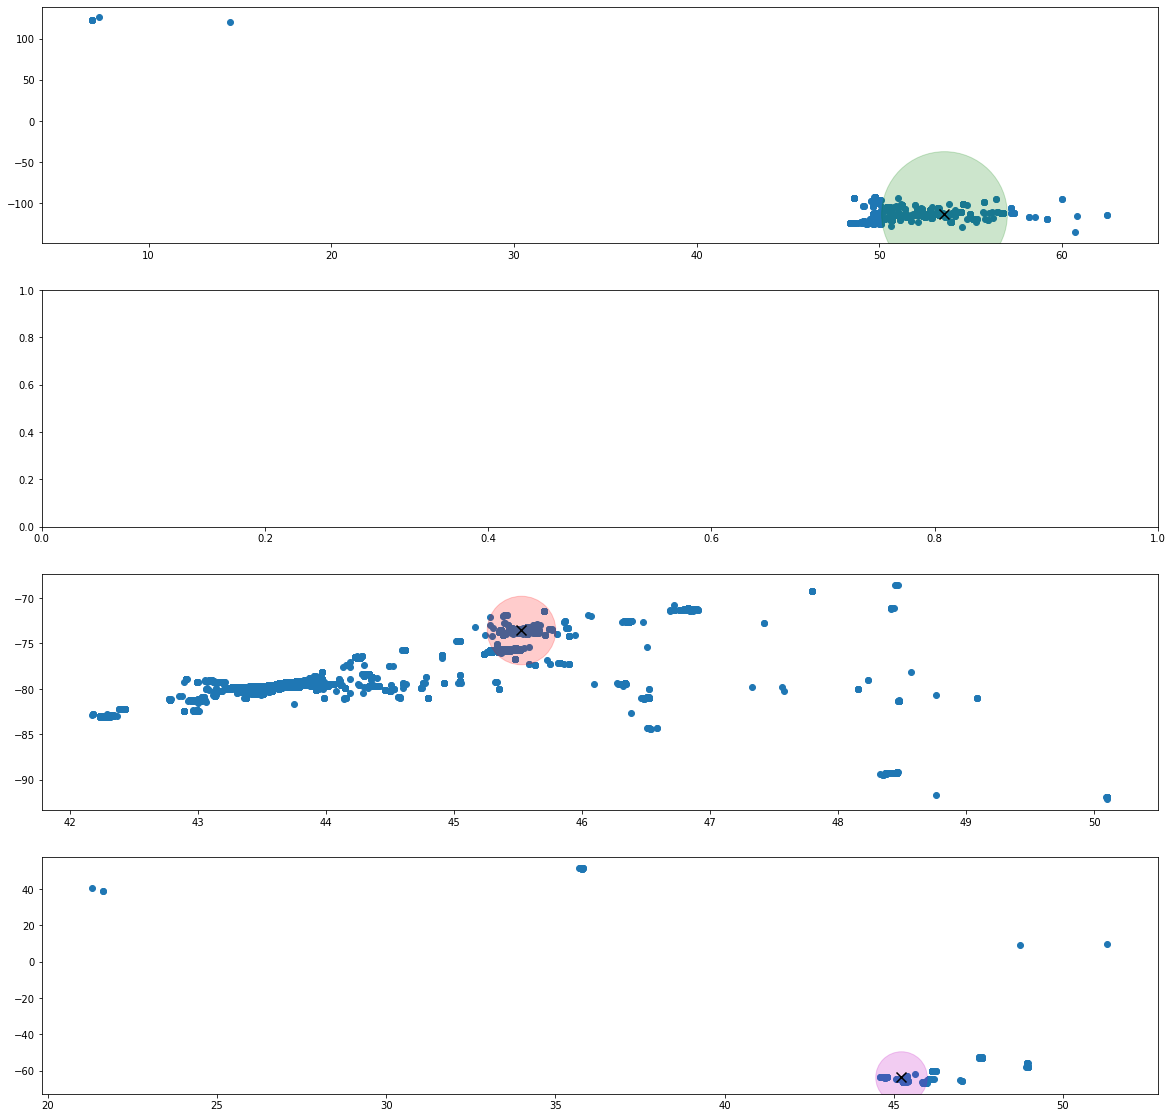

<Figure size 1440x1440 with 0 Axes>

In [74]:
# centers = np.array([[5,18], [3,14], [7,6]])
# m, n = make_blobs(n_samples=20, centers=[[5,18], [3,14], [7,6]], n_features=2, 
# cluster_std = 0.4)
fig, ax = plt.subplots(4, figsize=(20, 20))
colors = ['g', 'b', 'r', 'm']

plt.figure(num=None, figsize=(20,20), facecolor='w', edgecolor='k')

for i in range(len(centers)):
    if len(df_final[df_final['POIID'] == centers[i, 0]]) > 0:
        ax[i].scatter(df_final[df_final['POIID'] == centers[i, 0]]['Latitude'], df_final[df_final['POIID'] == centers[i, 0]]['Longitude'])
        ax[i].scatter(centers[i,1], centers[i,2], color = colors[i], marker = 'o', alpha = 0.2, s=max(df_final[df_final['POIID'] == centers[i, 0]]['Longitude'])**2)
        ax[i].scatter(centers[i,1], centers[i,2], color = 'k', marker = 'x', s = 100)

In [75]:
# centers = np.array([[5,18], [3,14], [7,6]])
# m, n = make_blobs(n_samples=20, centers=[[5,18], [3,14], [7,6]], n_features=2, 
# cluster_std = 0.4)
# colors = ['g', 'b', 'r', 'm']

# plt.figure(num=None, figsize=(7,6), facecolor='w', edgecolor='k')
# plt.scatter(m[:,0], m[:,1])

# for i in range(len(centers)):

#     plt.scatter(centers[i,0], centers[i,1], color = colors[i], marker = 'o', s = 13000, alpha = 0.2)
#     plt.scatter(centers[i,0], centers[i,1], color = 'k', marker = 'x', s = 50)


In [76]:
# No idea about ARea thing that was mentioned in the prolem, so skipping that

# 4a (Normalizing)

In [58]:
a, b = -10, 10
# Normalizing data
df_final['POI_normalized'] = df_final['distance_bw_poi']

In [59]:
max_poi_distance = max(df_final['distance_bw_poi'])
min_poi_distance = min(df_final['distance_bw_poi'])

In [60]:
def normalize_in_range(s):
    return ((b - a) * ((s - min_poi_distance)/(max_poi_distance - min_poi_distance))) + a

In [77]:
# lower + (upper - lower) * 596.931914

# ((b - a) * ((596.931914 - min_poi_distance)/(max_poi_distance - min_poi_distance))) + a

In [78]:
# Normalizing POI distances in (-10, 10)
df_final['POI_normalized'] = df_final['POI_normalized'].apply(normalize_in_range)

In [79]:
df_final.head()

,_ID,TimeSt,Country,Province,City,Latitude,Longitude,timestamp,timedifference,POIID,distance_bw_poi,Latitude_poi,Longitude_poi,POI_normalized
0,5044035,2017-06-21 00:36:58.600,CA,ON,Waterloo,43.4717,-80.5127,1.498005e+09,2218.457,POI3,596.001489,45.521629,-73.566024,-10.016156
1,5210735,2017-06-21 00:48:30.550,CA,ON,Waterloo,43.4737,-80.5309,1.498006e+09,2910.407,POI3,597.240651,45.521629,-73.566024,-10.016153
2,4550872,2017-06-21 01:01:34.483,CA,ON,Waterloo,43.4737,-80.5309,1.498007e+09,3694.340,POI3,597.240651,45.521629,-73.566024,-10.016153
3,5443472,2017-06-21 01:07:31.170,CA,ON,Waterloo,43.4717,-80.5127,1.498007e+09,4051.027,POI3,596.001489,45.521629,-73.566024,-10.016156
4,4548869,2017-06-21 02:01:31.370,CA,ON,Waterloo,43.4634,-80.5201,1.498010e+09,7291.227,POI3,596.931914,45.521629,-73.566024,-10.016154


In [80]:
df_final[df_final['POIID'] == 'POI1'].head()

,_ID,TimeSt,Country,Province,City,Latitude,Longitude,timestamp,timedifference,POIID,distance_bw_poi,Latitude_poi,Longitude_poi,POI_normalized
10875,5403290,2017-06-21 00:03:15.060,CA,SK,Saskatoon,52.12250,-106.72488,1.498003e+09,116.667,POI1,480.734450,53.546167,-113.485734,-10.016503
10876,5481803,2017-06-21 00:11:29.930,CA,SK,Saskatoon,52.09253,-106.58595,1.498004e+09,611.537,POI1,490.780661,53.546167,-113.485734,-10.016473
10877,5527288,2017-06-21 00:15:48.063,CA,SK,Saskatoon,52.12180,-106.64500,1.498004e+09,869.670,POI1,485.826658,53.546167,-113.485734,-10.016488
10878,5527357,2017-06-21 00:15:48.063,CA,SK,Saskatoon,52.12180,-106.64500,1.498004e+09,869.670,POI1,485.826658,53.546167,-113.485734,-10.016488
10879,4771232,2017-06-21 00:16:47.017,CA,SK,Saskatoon,52.13270,-106.65700,1.498004e+09,928.624,POI1,484.617844,53.546167,-113.485734,-10.016491


In [81]:
colors = {'POI1':"R", 'POI2':"Blue", 'POI3':"Y", "POI4": "Green"}
# c = ["Y", "R", "B"]

In [82]:
# fig, ax = plt.subplots(figsize=(10, 6))
# ax.scatter(x = df_final['POI_normalized'], y = df_final['POI_normalized'])
# plt.xlabel("Living Area Above Ground")
# plt.ylabel("House Price")

# plt.show()

POI1 R
POI2 Blue
POI3 Y
POI4 Green


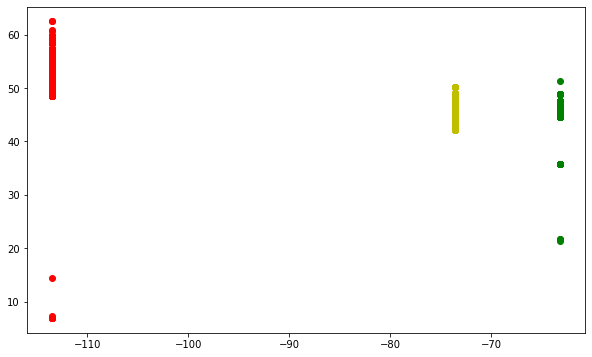

In [83]:
fig, ax = plt.subplots(figsize=(10, 6))

for color in colors:
    print(color, colors[color])
    ax.scatter(y = df_final[df_final['POIID'] == color]['Latitude'], x = df_final[df_final['POIID'] == color]['Longitude_poi'],
               c=colors[color])
    

In [84]:
# Honestly, Dont have much experience in hypothesis testing. So, skipping that too.